In [50]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


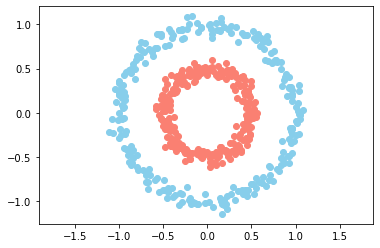

In [51]:
#Crear el Dataset
n = 500 #Numero de muestras
p = 2 #Características o parámetros que se utilizan de cada muestra

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c ="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c ="salmon")
plt.axis("equal")
plt.show()

In [79]:
Y.shape

(500, 1)

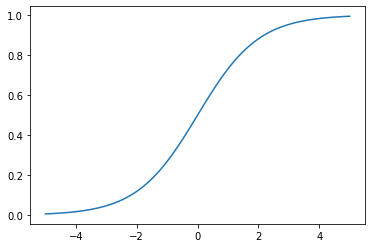

In [52]:
#Clase de la capa de la Red Neuronal
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur) * 2 - 1 #[0,1] * 2 = [0,2] - 1 = [-1,1]
        self.W = np.random.rand(1, n_neur) * 2 - 1 #[0,1] * 2 = [0,2] - 1 = [-1,1]
        
#Funciones de Activación
sigm = (lambda x: 1 / (1 + np.e**(-x)), #Así se definen dos funciones y se selecciona con sigm[0] o [1]
        lambda x: x * (1 - x)) #Derivada de la función sigmoide

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))

In [87]:
l0 = neural_layer(p, 4, sigm) #layer 0, capa 0, p = conexiones de entrada, 4 neuronas y activacion
l1 = neural_layer(4, 8, sigm) # p= conexiones es 4, 8 neuronas(4+4) y activacion

def create_nn(topology, act_f):
    
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    return nn


In [90]:
topology = [p, 4, 8, 16]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp- Yr)**2),
          lambda Yp, Yr: (Yp - Yr)) #Derivada del coste

In [95]:
X.shape
#Función de Entrenamiento

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):
    out = [(None, X)]
    
    #Forward pass
    for l, layer in enumerate(neural_net):
    
        z = np.dot(out[-1][1], neural_net[l].W) + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
    
    if train:
        #Backwards Pass
        deltas = []
        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) - 1:
                #Calculamos delta 0 ultima capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                #Calculamos delta respecto a capa previa
                deltas.insert(0, np.dot(deltas[0], _W.T) * neural_net[l].act_f[1](a))
            _W = neural_net[l].W
            
        #Gradient Descent
        neural_net[1].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
        neural_net[1].W = neural_net[l].W - np.dot(out[l][1].T, deltas[0]) * lr
        
    return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

ValueError: shapes (500,2) and (1,4) not aligned: 2 (dim 1) != 1 (dim 0)